# Homework 4

### Definition of timer

In [1]:
class ProgTimer():
    
    def __init__(self, func):
        self.func = func
    
    def progTimer(self, *args):
        from time import time
        from tqdm import tqdm
        RTs = []
        for i in tqdm(range(100000)):
            start_time = time()
            self.func(*args)
            stop_time = time()
            RTs.append(stop_time-start_time)
        return (sum(RTs)/100000)*10e3

### Import statements

In [2]:
import random
import matplotlib.pyplot as plt

###  Defintition of hash-insert and hash-search

These functions were created specifically for use with the 10-digit numbers.  It places them in a list of length 1021.  First $h(x) = k\ mod(p)$ is calculated with a sufficiently large prime.  Next it chooses a position in the hash table by calculating $h'(x) = h(x)\ mod(1021)$. I choose 9973 because it is not close to a power of two. Since $2^{13} = 8192$ and $2^{14} = 16384$. Hash insert and search both use a linear probe which increases the hash function by one upon finding a non-NIL value or not locating the value.

In [3]:
def hash_insert(T,k):
    i = 0
    p = 9973
    h = k % p
    while i != (len(T)-1):
        j = (h + i)%len(T)
        if T[j] == None:
            T[j] = k
            return j
        else:
            i += 1
    if i == (len(T)-1):
        print("Hash table overflow")
        
        
def hash_search(T,k):
    i = 0
    p = 9973
    h = k % p
    while i != (len(T)-1) or T[(h + i)%len(T)] != None:
            j = (h + i)%len(T)
            if T[j]==k:
                return j
            i += 1
    return None

I created these next two functions to test how hashing the values by only 1021 affected the runtime.

In [4]:
def hash_insert2(T,k):
    i = 0
    while i != (len(T)-1):
        j = (k + i)%len(T)
        if T[j] == None:
            T[j] = k
            return j
        else:
            i += 1
    if i == (len(T)-1):
        print("Hash table overflow")
        
        
def hash_search2(T,k):
    i = 0
    while i != (len(T)-1) or T[(k + i)%len(T)] != None:
            j = (k + i)%len(T)
            if T[j]==k:
                return j
            i += 1
    return None

## Testing with a larger prime
I wanted to test with a much larger prime to see if it made a difference.  I used 264631.

In [5]:

def hash_insert_test(T,k):
    i = 0
    p = 264631
    h = k % p
    while i != (len(T)-1):
        j = (h + i)%len(T)
        if T[j] == None:
            T[j] = k
            return j
        else:
            i += 1
    if i == (len(T)-1):
        print("Hash table overflow")
        
        
def hash_search_test(T,k):
    i = 0
    p = 264631
    h = k % p
    while i != (len(T)-1) or T[(h + i)%len(T)] != None:
            j = (h + i)%len(T)
            if T[j]==k:
                return j
            i += 1
    return None

## Generating the random 10-digit numbers

In [6]:
random.seed(1234)

In [7]:
keys = [random.randint(1000000000,9999999999) for x in range(1000)]

The functions require the hash table to initially be filled with NIL values.  I am using a dictionary structure for my hash table.

In [8]:
# initializing The hash table
T = {}

for x in range(1021):
    T[x] = None

### Insertion into the hash table

In [9]:
for k in keys:
    hash_insert(T,k)

These next lines are to ensure that all 1000 values have been inserted into the table

In [10]:
test = list(T.values())

In [11]:
test = [x for x in test if x != None]

In [12]:
print("There are {} numbers in the hash table T".format(len(test)))

There are 1000 numbers in the hash table T


### Generating random values for testing
The 50 unique numbers are the index position of a random selection of the 10-digit numbers.

In [13]:
unique50 = random.sample(range(1000), 50)

In [14]:
randkey = [keys[x] for x in unique50]

## Testing the runtime for the linear probe hash search

In [15]:
timer = ProgTimer(hash_search)

In [16]:
searchtimes = []
for k in randkey:
    s = timer.progTimer(T, k)
    searchtimes.append(s)

100%|██████████| 100000/100000 [00:00<00:00, 1674506.55it/s]


## Plotting
The orange bar has height 25 and is simply the average runtime for comparison purposes

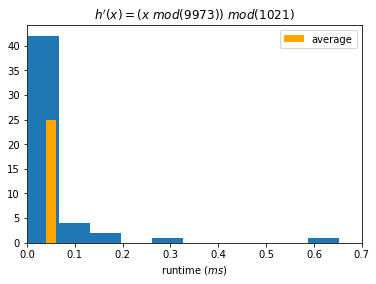

In [17]:
plt.hist(searchtimes)
avg = [sum(searchtimes)/50 for x in range(25)]
plt.hist(avg, bins = 50, color = 'orange', label = "average")
plt.title("$h'(x) = (x\ mod(9973))\ mod(1021)$")
plt.xlim(0, 0.7)
plt.xlabel("runtime ($ms$)")
plt.legend()
plt.savefig("plt1.png")

## Testing The hash function without the initial prime

In [18]:
T2 = {}

In [19]:
for x in range(1021):
    T2[x] = None

In [20]:
for k in keys:
    hash_insert2(T2,k)

In [21]:
timer = ProgTimer(hash_search2)

In [22]:
searchtimes2 = []
for k in randkey:
    s = timer.progTimer(T2, k)
    searchtimes2.append(s)

100%|██████████| 100000/100000 [00:00<00:00, 1776758.10it/s]


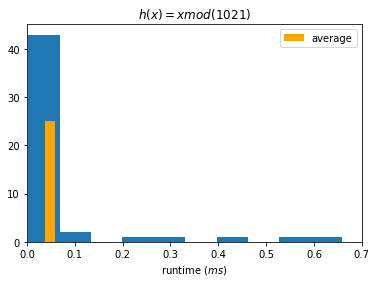

In [23]:
plt.hist(searchtimes2)
avg2 = [sum(searchtimes2)/50 for x in range(25)]
plt.hist(avg2, bins = 50, color = 'orange', label = "average")
plt.title("$h(x) = xmod(1021)$")
plt.xlim(0,0.7)
plt.xlabel("runtime ($ms$)")
plt.legend()
plt.savefig("plt2.png")

## Testing the hash function that uses a prime close to a power of two

In [24]:
T3 = {}

In [25]:
for x in range(1021):
    T3[x] = None

In [26]:
for k in keys:
    hash_insert_test(T3,k)

In [27]:
timer = ProgTimer(hash_search_test)

In [28]:
searchtimes3 = []
for k in randkey:
    s = timer.progTimer(T3, k)
    searchtimes3.append(s)

100%|██████████| 100000/100000 [00:00<00:00, 486542.07it/s]


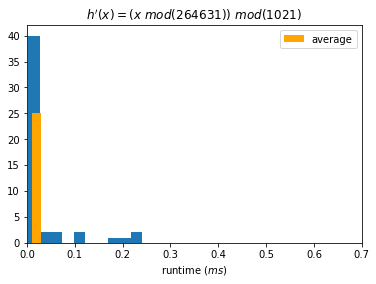

In [29]:
plt.hist(searchtimes3)
avg2 = [sum(searchtimes3)/50 for x in range(25)]
plt.hist(avg2, bins = 50, color = 'orange', label = "average")
plt.title("$h'(x) = (x\ mod(264631))\ mod(1021)$")
plt.xlim(0,0.7)
plt.xlabel("runtime ($ms$)")
plt.legend()
plt.savefig("plt3.png")

### Discussion

Using the prime in the initial step made a big difference in runtime which was facinating. This must mean that the extra step allows the keys to be more uniformely distributed.  Additionally, changing the prime by making it much larger had a drastic effect on the run time which must mean that it reduces the prime clustering.  It is interesting to see the effect of prime clustering on the runtime of hash-search.  While some of the values are returned almost instantaneously some take quite a bit longer to return because of this effect.